In [5]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# Download the Data through Kaggle API
from google.colab import files

In [6]:
import torch
import torchvision
import torchvision.transforms as transforms

In [7]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


In [8]:
import os
from glob import glob

In [9]:
# Using Kaggle API to Download the Dataset

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 63 bytes


In [10]:
# Download the Dataset
!kaggle datasets download -d defileroff/comic-faces-paired-synthetic-v2

 99% 2.16G/2.18G [00:17<00:00, 170MB/s]
100% 2.18G/2.18G [00:17<00:00, 137MB/s]


In [11]:
from zipfile import ZipFile
file_name = "/content/comic-faces-paired-synthetic-v2.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')
  zip.extractall(path="/content")

Done


In [12]:
import glob,random,os,shutil

In [13]:
comics = glob.glob('/content/face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/comics/**/*.jpg',recursive=True)
faces = glob.glob('/content/face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/faces/**/*.jpg',recursive=True)

random.shuffle(faces)
random.shuffle(comics)

train_perc = 0.8

os.makedirs('/content/real_comic_data/train/real')
os.makedirs('/content/real_comic_data/train/comic')
os.makedirs('/content/real_comic_data/val/real')
os.makedirs('/content/real_comic_data/val/comic')

for file in faces[:round(len(faces)*train_perc)]:
    shutil.copy(file,'/content/real_comic_data/train/real/')

for file in faces[round(len(faces)*train_perc):]:
    shutil.copy(file,'/content/real_comic_data/val/real/')

for file in comics[:round(len(comics)*train_perc)]:
    shutil.copy(file,'/content/real_comic_data/train/comic/')

for file in comics[round(len(comics)*train_perc):]:
    shutil.copy(file,'/content/real_comic_data/val/comic/')

In [14]:
train_dir = '/content/real_comic_data/train'
val_dir = '/content/real_comic_data/val'

In [16]:
train_num_files=len([file for file in glob.glob(str(train_dir)+"/**/*.jpg",recursive=True)])
val_num_files=len([file for file in glob.glob(str(val_dir)+"/**/*.jpg",recursive=True)])
print("Training Images:", train_num_files)
print("Validation Images:", val_num_files)

Training Images: 16000
Validation Images: 4000


In [17]:
transform = transforms.Compose([
    transforms.Resize(224),  
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

batch_size = 64

trainset = torchvision.datasets.ImageFolder(root= train_dir, 
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.ImageFolder(root=val_dir,
                                       transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=True, num_workers=2)

classes = ('comic', 'real')

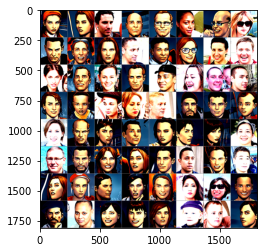

comic comic real  comic comic real  comic real  comic comic comic real  comic comic real  real  real  comic real  comic real  real  real  real  comic comic real  real  real  comic comic comic real  comic comic comic comic comic comic real  real  comic comic comic comic real  comic real  comic comic comic comic comic real  real  comic comic real  comic comic comic real  real  comic


In [18]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [19]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2_1 = nn.Conv2d(6, 16, 5)

        self.conv2 = nn.Conv2d(16, 32, 3)
        # self.pool_2 = nn.MaxPool2d(2, 2)
        self.conv2_2 = nn.Conv2d(32, 64, 3)

        self.conv3 = nn.Conv2d(64, 128, 3)
        # self.pool_3 = nn.MaxPool2d(2, 2)
        self.conv2_3 = nn.Conv2d(128, 256, 3)
        
        self.fc1 = nn.Linear(256, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2_1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv2_2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv2_3(x)))

        # print(x.shape)
        x = x.reshape(-1, 256) # flatten all dimensions except batch
        
        x = F.relu(self.fc1(x))
        # print('2')
        x = F.relu(self.fc2(x))
        # print('3')
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2_1): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2_2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv2_3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [20]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [21]:
print("Model Training Started .....")
for epoch in range(35):  # loop over the dataset multiple times
    print(epoch, "Epoch ============================== Completed...")
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = net(inputs)

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        
        running_loss += loss.item()
        # 200 is a mini batch size
        if i % 200 == 199:    
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Training Completed')

Model Training Started .....
0 Epoch ============================== Completed...
[1,   200] loss: 1.827
1 Epoch ============================== Completed...
[2,   200] loss: 0.794
2 Epoch ============================== Completed...
[3,   200] loss: 0.340
3 Epoch ============================== Completed...
[4,   200] loss: 0.083
4 Epoch ============================== Completed...
[5,   200] loss: 0.036
5 Epoch ============================== Completed...
[6,   200] loss: 0.018
6 Epoch ============================== Completed...
[7,   200] loss: 0.012
7 Epoch ============================== Completed...
[8,   200] loss: 0.010
8 Epoch ============================== Completed...
[9,   200] loss: 0.009
9 Epoch ============================== Completed...
[10,   200] loss: 0.007
10 Epoch ============================== Completed...
[11,   200] loss: 0.006
11 Epoch ============================== Completed...
[12,   200] loss: 0.005
12 Epoch ============================== Completed...
[13,   200] l

In [22]:
PATH = './faces_net.pth'
torch.save(net.state_dict(), PATH)

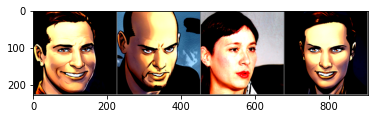

Classification Results:  comic comic real  comic


In [23]:
import cv2 
from torchvision.utils import save_image

dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images[0:4]))
print('Classification Results: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))


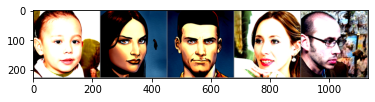

Classification Results:  real  comic real  comic comic


In [32]:
# testing instance 2
imshow(torchvision.utils.make_grid(images[5:10]))
print('Classification Results: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(5)))

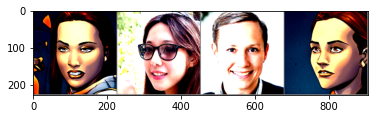

Classification Results:  real  real  comic real 


In [46]:
# testing instance 3
imshow(torchvision.utils.make_grid(images[13:17]))
print('Classification Results: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

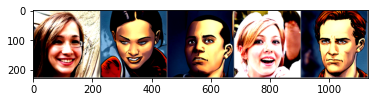

Classification Results:  real  real  comic real  comic


In [44]:
# testing instance 4
imshow(torchvision.utils.make_grid(images[20:25]))
print('Classification Results: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(5)))

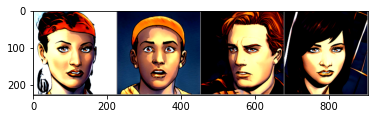

Classification Results:  real  real  comic real 


In [37]:
# testing instance 5
imshow(torchvision.utils.make_grid(images[28:32]))
print('Classification Results: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [24]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [25]:
outputs = net(images)

In [26]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  comic comic real  comic


In [27]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test folder images: {100 * correct // total} %')

Accuracy of the network on the test folder images: 99 %


In [33]:
# Create the folder for save the classification result images 
os.makedirs('/content/classification_results/real_face_result')
os.makedirs('/content/classification_results/comic_face_result')

In [34]:
# predictions for each class
# from zipfile import ZipFile as zipfile

correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
count = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for i in range(len(images)):
            image = images[i]
            prediction = predictions[i]

            count += 1
            image = image / 2 + 0.5     
            image = image.numpy()
            image = np.transpose(image, (1, 2, 0))
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            result = cv2.normalize(image, dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

            if prediction == 0:
                cv2.imwrite("/content/classification_results/comic_face_result/img-{}.jpg".format(count), result)
            elif prediction == 1:
                cv2.imwrite("/content/classification_results/real_face_result/img-{}.jpg".format(count), result)
                
        # for label, prediction in zip(labels, predictions):
        for i in range(len(labels)):
            label = labels[i]
            prediction = predictions[i]

            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1
 

# Accuracy form each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: comic is 99.9 %
Accuracy for class: real  is 100.0 %
